# Tugas 2 - Analisis "Kenapa Harus NumPy"
Melanjutkan materi pada bagian *Kenapa harus NumPy*, notebook ini mendokumentasikan kembali eksperimen sederhana untuk membandingkan list Python biasa dengan `numpy.array`. Fokusnya: (1) cara operasi matematis dieksekusi, (2) performa komputasi, dan (3) efisiensi memori. Hasil dan catatan di bawah merupakan jawaban yang akan saya jelaskan ke asisten pengampu.


In [4]:
import time
import sys
import numpy as np

N = 1_000_000
python_list = list(range(N))
numpy_array = np.arange(N)

print(f"Jumlah elemen: {N:,}")


Jumlah elemen: 1,000,000


In [5]:
# 1) Perbedaan perilaku operasi matematis
sample_list_a = [1, 2, 3]
sample_list_b = [4, 5, 6]
sample_numpy_a = np.array(sample_list_a)
sample_numpy_b = np.array(sample_list_b)

list_plus = sample_list_a + sample_list_b  # konkatenasi
numpy_plus = sample_numpy_a + sample_numpy_b  # penjumlahan elemen per elemen

print("List + List menghasilkan konkatenasi:", list_plus)
print("NumPy array + NumPy array menghasilkan penjumlahan vektor:", numpy_plus)

scaled_list = [x * 2 for x in sample_list_a]
scaled_numpy = sample_numpy_a * 2
print("List * 2 harus melalui iterasi manual:", scaled_list)
print("NumPy * 2 otomatis melakukan broadcasting:", scaled_numpy)


List + List menghasilkan konkatenasi: [1, 2, 3, 4, 5, 6]
NumPy array + NumPy array menghasilkan penjumlahan vektor: [5 7 9]
List * 2 harus melalui iterasi manual: [2, 4, 6]
NumPy * 2 otomatis melakukan broadcasting: [2 4 6]


In [6]:
# 2) Performa komputasi: loop python vs operasi vektorisasi NumPy

def scale_with_list(values, factor):
    return [value * factor for value in values]


def scale_with_numpy(array, factor):
    return array * factor


def benchmark(func, *args, repeat=5):
    durations = []
    for _ in range(repeat):
        start = time.perf_counter()
        func(*args)
        durations.append(time.perf_counter() - start)
    return min(durations)

list_time = benchmark(scale_with_list, python_list, 2)
numpy_time = benchmark(scale_with_numpy, numpy_array, 2)

print(f"Waktu minimal proses skala dengan list : {list_time:.4f} detik")
print(f"Waktu minimal proses skala dengan NumPy: {numpy_time:.4f} detik")
print(f"NumPy lebih cepat ~{list_time / numpy_time:.1f}× dari list pada operasi ini")


Waktu minimal proses skala dengan list : 0.1019 detik
Waktu minimal proses skala dengan NumPy: 0.0026 detik
NumPy lebih cepat ~38.7× dari list pada operasi ini


In [7]:
# 3) Konsumsi memori: objek list menyimpan pointer + objek integer terpisah
sample_size = 10_000
list_sample = list(range(sample_size))
numpy_sample = np.arange(sample_size)

list_memory = sys.getsizeof(list_sample) + sum(sys.getsizeof(item) for item in list_sample)
numpy_memory = numpy_sample.nbytes  # jumlah byte aktual pada array NumPy (kontigu)

print(f"Ukuran list ({sample_size:,} angka) : {list_memory / 1024:.2f} KB")
print(f"Ukuran NumPy array : {numpy_memory / 1024:.2f} KB")
print("Rasio pemakaian memori list / numpy:", list_memory / numpy_memory)



Ukuran list (10,000 angka) : 351.62 KB
Ukuran NumPy array : 78.12 KB
Rasio pemakaian memori list / numpy: 4.5007


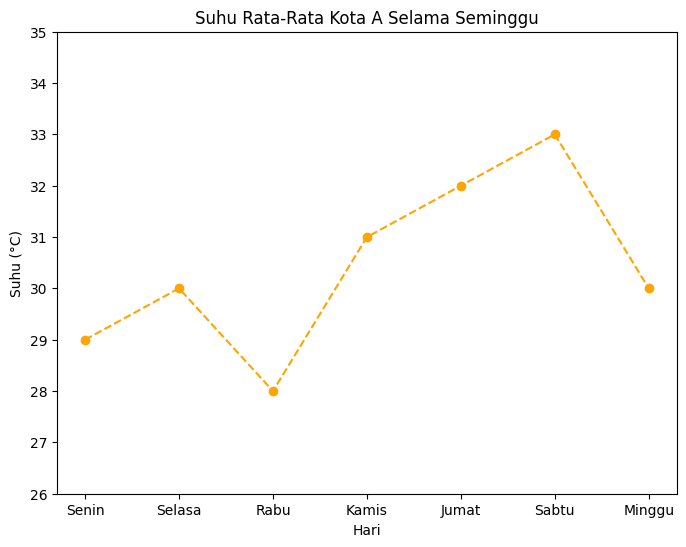

In [8]:
import matplotlib.pyplot as plt
import numpy as np #jangan lupa import library ya

# Data suhu rata-rata (dalam °C) selama 7 hari
hari = np.array(["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"])
suhu_kotaA = np.array([29, 30, 28, 31, 32, 33, 30])

# Membuat figure dan diagram plot / garis
plt.figure(figsize=(8, 6))
plt.plot(hari, suhu_kotaA, color='orange', linestyle='--', marker='o')

# Memberi judul dan label
plt.title("Suhu Rata-Rata Kota A Selama Seminggu")
plt.xlabel("Hari")
plt.ylabel("Suhu (°C)")

# Mengatur batas sumbu Y agar lebih rapi
plt.ylim([26, 35]) # y  dimulai dari 26-35

plt.show()

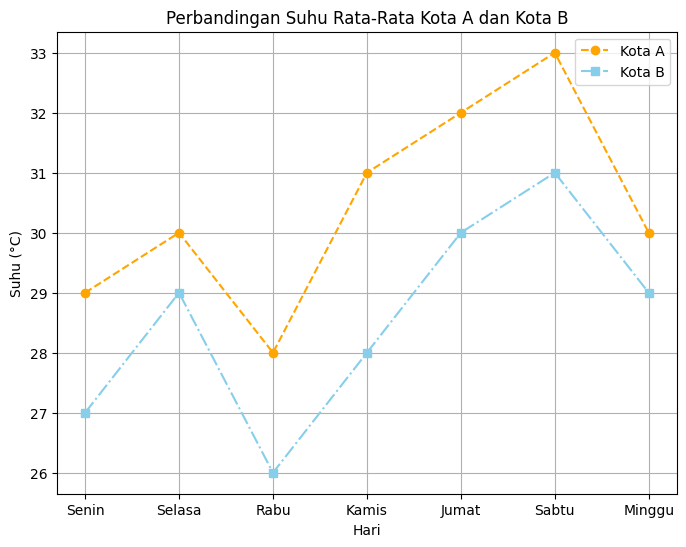

In [9]:
# Data tanpa np.array (numpy)
hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Data suhu kotaB rata-rata (°C) selama 7 hari
suhu_kotaB = [27, 29, 26, 28, 30, 31, 29]
suhu_kotaA = [29, 30, 28, 31, 32, 33, 30]

# Membuat grafik dengan dua garis
plt.figure(figsize=(8, 6))
plt.plot(hari, suhu_kotaA, label="Kota A", color='orange', marker='o', linestyle='--')
plt.plot(hari, suhu_kotaB, label="Kota B", color='skyblue', marker='s', linestyle='-.')

# Menambahkan elemen pendukung grafik
plt.title("Perbandingan Suhu Rata-Rata Kota A dan Kota B")
plt.xlabel("Hari")
plt.ylabel("Suhu (°C)")
plt.legend()
plt.grid(True)

plt.show()

Mengapa harus Numpy?